### Data Understanding

Dataset ini berasal dari jurnal ilmiah yang berjudul "Hotel booking demand datasets" yang ditulis oleh Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. Penjelasan tiap feature atau variabel dari jurnal bisa di akses pada https://www.sciencedirect.com/science/article/pii/S2352340918315191. Dataset ini berisi 119390 observasi untuk City Hotel dan Resort Hotel. Setiap pengamatan mewakili pemesanan hotel antara 1 Juli 2015 sampai 31 Agustus 2017, termasuk pemesanan yang berhasil dan pemesanan yang dibatalkan. 

Keterangan setiap kolom dapat dilihat di https://www.kaggle.com/datasets/mojtaba142/hotel-booking

# Import Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import calendar
import scipy.stats as stats
from scipy import stats

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [2]:
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
!pip install category_encoders
import category_encoders as ce
!pip install pycountry
!pip install feature_engine

# Load Data

In [7]:
#load data
df = pd.read_csv('hotel_booking.csv')

In [8]:
# Data Splitting menggunakan cara drop Target dan feature yang tidak dipakai

X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95512, 35), (23878, 35), (95512,), (23878,))

In [31]:
X_train.sample(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
84427,City Hotel,80,2016,February,9,22,1,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,28.0,NaN,0,Transient,60.0,0,0,Check-Out,2016-02-26,Jose Garcia,Jose_Garcia@yahoo.com,875-791-2518,************8308
70374,City Hotel,364,2017,June,24,16,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,21.0,NaN,0,Transient-Party,75.0,0,0,Canceled,2017-06-07,Brian Scott,Brian.S@verizon.com,778-775-1519,************6523
91146,City Hotel,256,2016,June,25,15,0,2,1,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,6.0,NaN,0,Transient-Party,90.0,0,0,Check-Out,2016-06-17,Brenda Case,BrendaCase58@yandex.com,689-989-3843,************2306
20974,Resort Hotel,39,2016,February,7,13,0,1,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,58.0,0,0,Check-Out,2016-02-14,Gregory George,George.Gregory36@xfinity.com,934-853-3102,************3001
105796,City Hotel,16,2017,February,7,13,1,1,2,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,2,Check-Out,2017-02-15,Thomas Reyes,Reyes_Thomas@yandex.com,338-009-9254,************9371


In [ ]:
# Informasi general tentang dataframe

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95512 entries, 105447 to 6068
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           95512 non-null  object 
 1   lead_time                       95512 non-null  int64  
 2   arrival_date_year               95512 non-null  int64  
 3   arrival_date_month              95512 non-null  object 
 4   arrival_date_week_number        95512 non-null  int64  
 5   arrival_date_day_of_month       95512 non-null  int64  
 6   stays_in_weekend_nights         95512 non-null  int64  
 7   stays_in_week_nights            95512 non-null  int64  
 8   adults                          95512 non-null  int64  
 9   children                        95508 non-null  float64
 10  babies                          95512 non-null  int64  
 11  meal                            95512 non-null  object 
 12  country                     

In [ ]:
# mengetahui jumlah baris yang kosong 

X_train.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             391
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13034
company                           90111
days_in_waiting_list                  0


In [ ]:
# Mencari Duplicated Data

X_train.duplicated().sum()

0

In [9]:
# Pemisahan X_train numerikal dan kategorikal

# daftar kolom numerikal
nums = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
 'previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']

# daftar kolom kategorikal yang berbentuk object
cats_obj = ['hotel','arrival_date_month', 'meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status',
 'reservation_status_date','name','email','phone-number','credit_card']

# daftar kolom kategorikal yang berbentuk integer/float
cats_int = ['arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_week_number', 'is_repeated_guest', 'agent', 'company']

# Descriptive Statistics

## Statistical Summary

In [10]:
# ringkasan statistik dari X_train numerikal

X_train[nums].describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,95512.000000,95512.000000,95512.000000,95512.000000,95508.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000,95512.000000
mean,103.879931,0.927444,2.498953,1.856008,0.103279,0.007737,0.085173,0.137805,0.220988,2.310170,101.779655,0.062285,0.571038
std,106.870094,0.998429,1.910708,0.584467,0.397270,0.098106,0.818956,1.508625,0.657871,17.389771,51.012508,0.245457,0.792710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,71.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
# ringkasan statistik dari X_train kategorikal tanpa kolom arrival_date_year,arrival_date_day_of_month, arrival_date_week_number, agent,company, is_repeated_guest

X_train[cats_obj].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,95512,95512,95512,95121,95512,95512,95512,95512,95512,95512,95512,95512,95512,95512,95512,95512
unique,2,12,5,172,8,5,10,12,3,4,3,922,68397,93185,95512,8999
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Robert Smith,JJohnson@hotmail.com,715-252-1224,************3352
freq,63585,11060,73867,38934,45214,78427,68837,59295,83662,71610,60133,1173,40,5,1,23


In [12]:
# ringkasan statistik dari X_train kategorikal berbentuk integer/float

X_train[cats_int].describe()

,arrival_date_year,arrival_date_day_of_month,arrival_date_week_number,is_repeated_guest,agent,company
count,95512.000000,95512.000000,95512.000000,95512.000000,82478.000000,5401.000000
mean,2016.156483,15.799575,27.127994,0.031556,86.633163,189.220330
std,0.706882,8.792557,13.610117,0.174816,110.549821,132.159089
min,2015.000000,1.000000,1.000000,0.000000,1.000000,6.000000
25%,2016.000000,8.000000,16.000000,0.000000,9.000000,62.000000
50%,2016.000000,16.000000,27.000000,0.000000,14.000000,178.000000
75%,2017.000000,23.000000,38.000000,0.000000,229.000000,269.000000
max,2017.000000,31.000000,53.000000,1.000000,535.000000,543.000000


In [14]:
# menentukan outliers menggunakan IQR

def iqr_outliers(X_train):
    for x in X_train:
        Q1,Q3 = np.percentile(X_train[x], [25,75])
        IQR = Q3 - Q1
        ul = Q3+1.5*IQR
        ll = Q1-1.5*IQR
        
        outliers = []
        for i in X_train[x]:
            if i > ul or i < ll:
                outliers.append(i)
        
        print(x)
        print(pd.Series(outliers).sort_values(ascending=False))
        print("\n")

iqr_outliers(X_train[nums])

lead_time
1268    737
1540    629
928     629
205     629
2331    629
       ... 
218     374
1604    374
2128    374
858     374
1429    374
Length: 2386, dtype: int64


stays_in_weekend_nights
26     19
48     16
126    16
139    16
186    14
       ..
113     6
111     6
110     6
41      6
135     6
Length: 211, dtype: int64


stays_in_week_nights
303     50
577     41
1528    40
1723    40
2284    35
        ..
1381     7
1380     7
1378     7
1375     7
2695     7
Length: 2696, dtype: int64


adults
17516    55
4196     50
10109    40
20374    27
11262    26
         ..
22689     0
11834     0
19546     0
14333     0
6603      0
Length: 23857, dtype: int64


children
Series([], dtype: float64)


babies
156    10
291     9
72      2
136     2
653     2
       ..
241     1
242     1
243     1
244     1
709     1
Length: 710, dtype: int64


previous_cancellations
4630    26
2211    26
867     26
67      26
2062    26
        ..
1774     1
1773     1
1772     1
1771     1
5170     1


# Multivariate Analysis

In [15]:
# Heatmap Correlation Spearman untuk Categoricals

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Use label encoder method for categorical features

bucket = cats_obj + cats_int
for i in bucket:
    df[i] = labelencoder.fit_transform(df[i])
    
# Create new DataFrame for categorical data
dfCategorical = df[['is_canceled'] + bucket]

# Check DataFrame details
dfCategorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   is_canceled                119390 non-null  int64
 1   hotel                      119390 non-null  int32
 2   arrival_date_month         119390 non-null  int32
 3   meal                       119390 non-null  int32
 4   country                    119390 non-null  int32
 5   market_segment             119390 non-null  int32
 6   distribution_channel       119390 non-null  int32
 7   reserved_room_type         119390 non-null  int32
 8   assigned_room_type         119390 non-null  int32
 9   deposit_type               119390 non-null  int32
 10  customer_type              119390 non-null  int32
 11  reservation_status         119390 non-null  int32
 12  reservation_status_date    119390 non-null  int32
 13  name                       119390 non-null  int32
 14  emai

In [36]:
#Create new DataFrame for numerical data
dfNumerical= df.drop(bucket, axis = 1)

# Check DataFrame details
dfNumerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   stays_in_weekend_nights         119390 non-null  int64  
 3   stays_in_week_nights            119390 non-null  int64  
 4   adults                          119390 non-null  int64  
 5   children                        119386 non-null  float64
 6   babies                          119390 non-null  int64  
 7   previous_cancellations          119390 non-null  int64  
 8   previous_bookings_not_canceled  119390 non-null  int64  
 9   booking_changes                 119390 non-null  int64  
 10  days_in_waiting_list            119390 non-null  int64  
 11  adr                             119390 non-null  float64
 12  required_car_par

Text(0.5, 1.0, 'Correlation Matrix-Spearman Method (Categorical Data)')

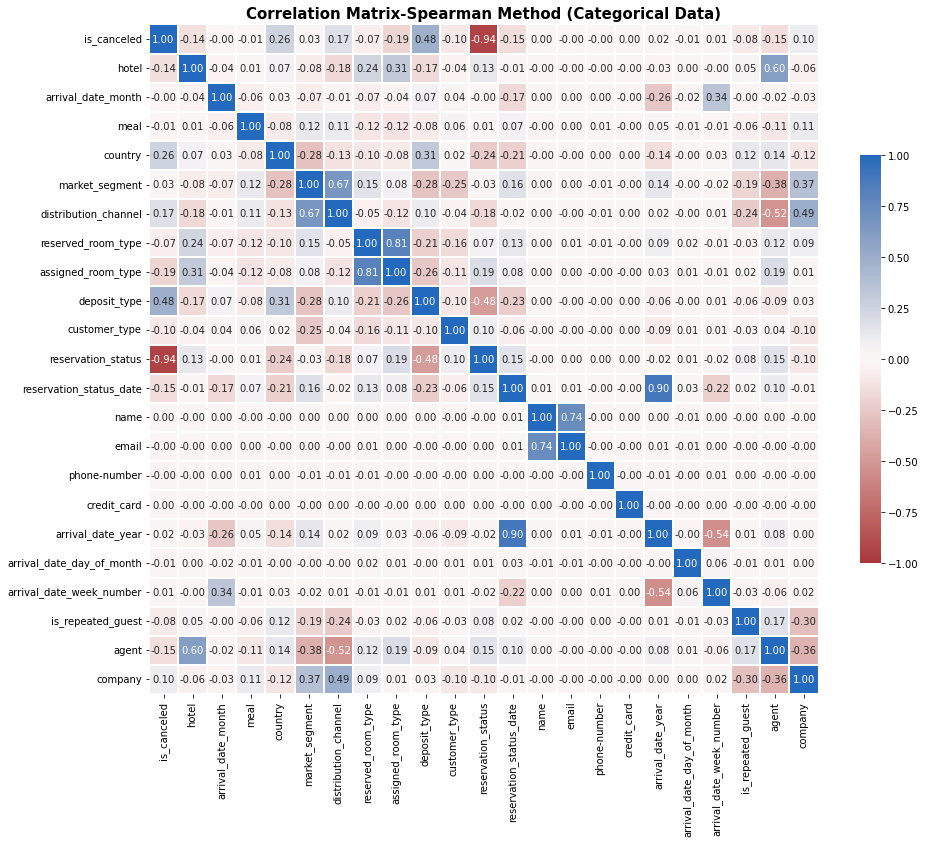

In [37]:
# Correlation matrix with Spearman method
plt.figure(figsize=(15,15))
corrCategorical=dfCategorical.corr(method='spearman')
maskCategorical = np.triu(np.ones_like(corrCategorical, dtype=np.bool))
sns.heatmap(corrCategorical, annot=True, fmt=".2f", cmap='vlag_r', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(23, 0))
plt.title("Correlation Matrix-Spearman Method (Categorical Data)",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix-Pearson Method (Numerical Data)')

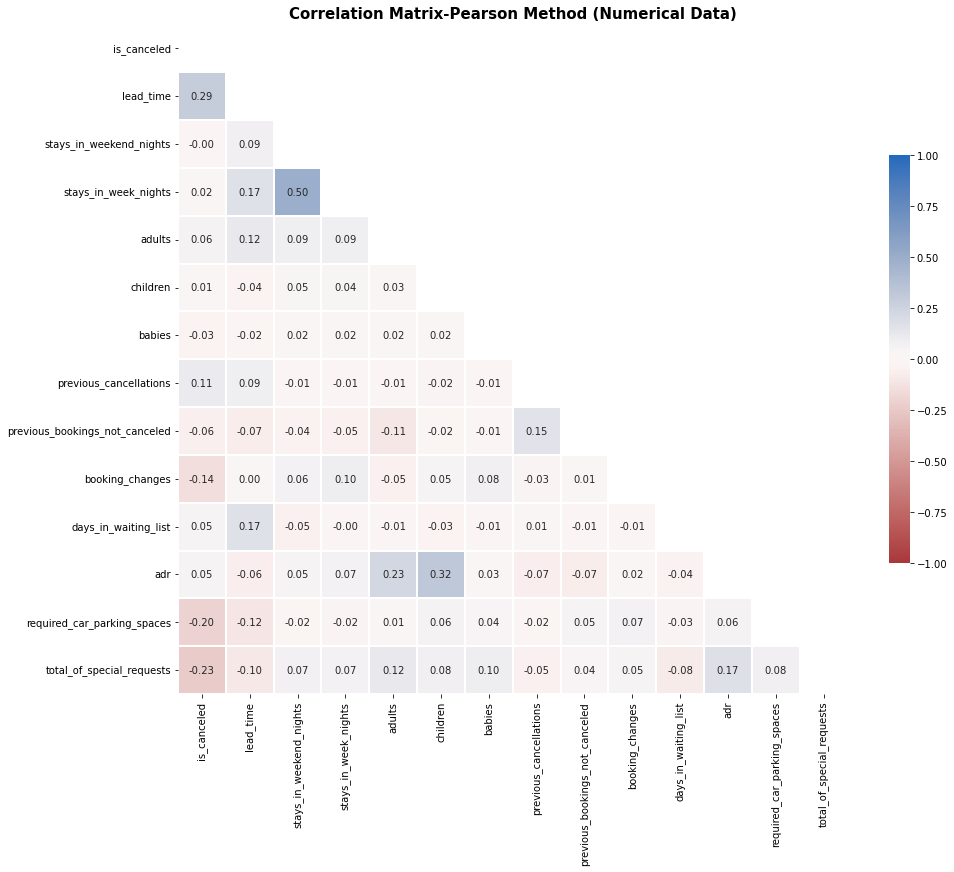

In [38]:
# Correlation matrix with Pearson method (for Numericals)
plt.figure(figsize=(15,15))
corrNumerical= dfNumerical.corr(method='pearson')
maskNumerical = np.triu(np.ones_like(corrNumerical, dtype=np.bool))
sns.heatmap(corrNumerical, annot=True, fmt=".2f", cmap='vlag_r', mask= maskNumerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(14, 0))
plt.title("Correlation Matrix-Pearson Method (Numerical Data)",size=15, weight='bold')

# Handling Outlier

In [16]:
#menggabungkan X_train dan y_train sebelum handling outliers
train =  pd.concat([X_train, pd.DataFrame(y_train)], axis=1)
train.sample(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,is_canceled
116582,City Hotel,265,2017,July,29,19,0,3,2,0.0,0,BB,NLD,Direct,Direct,0,0,0,A,D,2,No Deposit,14.0,NaN,0,Transient,89.10,0,4,Check-Out,2017-07-22,Jason Molina,JasonMolina@att.com,447-524-7588,************4116,0
3828,Resort Hotel,1,2016,January,3,16,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,59.00,0,1,No-Show,2016-01-16,Justin Tran,Justin.Tran35@mail.com,102-132-3989,************9399,1
61764,City Hotel,260,2016,December,53,26,1,3,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,73.95,0,0,Canceled,2016-04-28,Marie Horton,Horton.Marie90@outlook.com,513-449-3419,************8509,1
22388,Resort Hotel,30,2016,March,13,23,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,60.00,0,0,Check-Out,2016-03-24,James Martinez,James.Martinez@protonmail.com,869-337-2490,************6244,0
77651,City Hotel,98,2015,December,52,26,2,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,1,0,A,A,0,No Deposit,8.0,NaN,0,Transient,118.00,0,1,Canceled,2015-09-24,Mallory Ramos,Ramos.Mallory@yandex.com,160-751-1259,************1730,1


In [17]:
#menghilangkan outlier extremen value pada kolom adults dan booking_changes

train.drop(train[(train['adults'] > 30)].index, inplace=True)
train.drop(train[(train['booking_changes'] > 19)].index, inplace=True)

In [18]:
numeric = ['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights']
for col in numeric:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5*IQR
    high_lim = Q3 + 1.5*IQR
    outlier = []
    for x in train[col]:
        if ((x > high_lim) or (x < low_lim)):
            i = train[train[col]== x].index
            train.drop(i, axis=0,inplace=True)
train.shape

(87505, 36)

# Feature Selection

In [19]:
train = train.drop(['name', 'phone-number', 'credit_card', 'email','company', 'reservation_status', 'reserved_room_type', 'arrival_date_year'], axis=1)
train.shape

(87505, 28)

In [20]:
X_test = X_test.drop(['name', 'phone-number', 'credit_card', 'email','company','reservation_status','reserved_room_type','arrival_date_year'], axis=1)
X_test.shape

(23878, 27)

# Pipeline

In [21]:
# Drop target dari fitur
X_train = train.drop(columns = ['is_canceled'])
y_train = train['is_canceled']
X_train.shape, y_train.shape

((87505, 27), (87505,))

In [22]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer

# Missing-Values Imputer Function
class MissingImputer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  
  def transform(self, X):
    imputer = SimpleImputer(strategy='median')
    X['children'] = imputer.fit_transform(X[['children']])

    imputer = SimpleImputer(strategy='most_frequent')
    X['agent'] = imputer.fit_transform(X[['agent']])

    imputer = SimpleImputer(strategy='most_frequent')
    X['country'] = imputer.fit_transform(X[['country']])

    return X

# Replace-Imputer Function
class ReplaceImputer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  
  def transform(self, X):
    undefined_var = ['market_segment', 'distribution_channel']
    for i in undefined_var :
      X[i].replace('Undefined', X[i].mode()[0], inplace=True)

    X['meal'].replace('Undefined', 'SC', inplace=True)

    imputer = SimpleImputer(strategy='median')
    X['adults'].mask(X['adults'] == 0, imputer)

    imputer = KNNImputer(n_neighbors=5)
    X['adr'].mask(X['adr'] < 0, imputer)

    return X

# Country-Replacer Function
class CountryReplacer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  
  def transform(self, X):
    
    import pycountry
    countries = {}
    for country in pycountry.countries:
      countries[country.alpha_3] = country.alpha_3
    X['country'] = [countries.get(country, X['country'].mode()[0]) for country in X['country']]

    return X

# Feature Extraction Function
class FeatureExtraction(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
    
  def transform(self, X):
    import datetime as dt
    #change agent to object 
    X['agent']= X['agent'].astype(str)
    
    #change children to integer
    X['children']= X['children'].astype('int64')

    #change reservation_status_date to datetime
    X['reservation_status_date'] = pd.to_datetime(X['reservation_status_date'])

    #extract reservation_status_date to _year, _month, and _day
    X['reservation_status_year'] = X['reservation_status_date'].dt.year
    X['reservation_status_month'] = X['reservation_status_date'].dt.month
    X['reservation_status_day'] = X['reservation_status_date'].dt.day

    #drop reservation_status_date
    X = X.drop(['reservation_status_date'],  axis = 1)
    
    #create visitor_origin from country
    X['visitor_origin'] = X['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')

    #drop country
    X = X.drop(['country'],  axis = 1)

    #create kids column 
    X['kids'] = X['children'] + X['babies']
    
    #drop children and babies
    X = X.drop(['children', 'babies'], axis = 1)

    #create previous cancellations category column
    X['previous_cancellations_cats'] = X['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)

    #drop previous cancellations
    X = X.drop(['previous_cancellations'],  axis = 1)

    #create required_car_parking_spaces category column
    X['required_car_parking_spaces_cat'] = X['required_car_parking_spaces'].apply(lambda x: 0 if x == 0 else 1)

    #drop required_car_parking_spaces
    X = X.drop(['required_car_parking_spaces'],  axis = 1)

    #create previous_bookings_not_canceled category column
    X['previous_bookings_not_canceled_cat'] = X['previous_bookings_not_canceled'].apply(lambda x: 0 if x == 0 else 1)

    #drop previous_bookings_not_canceled
    X = X.drop(['previous_bookings_not_canceled'],  axis = 1)

    #create total_of_special_requests category column
    X['total_of_special_requests_cat'] = X['total_of_special_requests'].apply(lambda x: 0 if x == 0 else 1)

    #drop total_of_special_requests
    X = X.drop(['total_of_special_requests'],  axis = 1)

    #create days_in_waiting_list category column
    X['days_in_waiting_list_cat'] = X['days_in_waiting_list'].apply(lambda x: 0 if x == 0 else 1)

    #drop days_in_waiting_list category
    X = X.drop(['days_in_waiting_list'],  axis = 1)

    #create kids_cat column
    X['kids_cat'] = X['kids'].apply(lambda x: 0 if x == 0 else 1)

    #drop kids category
    X = X.drop(['kids'],  axis = 1)

    return X

# Feature Transformation Function
class FeatureTransformation(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  
  def transform(self, X):
    num = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults', 'booking_changes', 'adr']
    power = PowerTransformer(method='yeo-johnson', standardize = True)
    X[num] = power.fit_transform(X[num])
    for i in num:
      scaler = StandardScaler()
      X[i]= scaler.fit_transform(X[i].values.reshape(len(X), 1))
        
    return X

# Feature Encoding Function
class FeatureEncoding(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  
  def transform(self, X):
    label_encoding = ['hotel','visitor_origin']
    one_hot_encoding = ['arrival_date_month','meal','market_segment','distribution_channel',
                        'assigned_room_type','deposit_type','customer_type',
                        'reservation_status_year', 'reservation_status_month']
    binary_encoding = ['arrival_date_day_of_month','arrival_date_week_number','agent', 'reservation_status_day']
    
    #label encoding
    mapping_hotel = {'City Hotel' : 0, 'Resort Hotel' : 1}

    mapping_visitor_origin = {'Local' : 0, 'International' : 1}

    X['hotel'] = X['hotel'].map(mapping_hotel)
    X['visitor_origin'] = X['visitor_origin'].map(mapping_visitor_origin)

    #one-hot encoding
    encoder = OneHotEncoder(handle_unknown='error')
    categorical_cols = one_hot_encoding
    for i in categorical_cols:
      matrix = encoder.fit_transform(X[[i]]).toarray()
      column_names = X[i].unique().tolist()
      for j in range(len(matrix.T)):
          X[column_names[j]] = matrix.T[j]
      X.drop([i], axis=1)

    #binary encoding
    import category_encoders as ce

    encoder = ce.BinaryEncoder(cols = binary_encoding, handle_unknown='error')
    binary = encoder.fit_transform(X[binary_encoding])
    X.index = binary.index
    X = pd.concat([X, binary], axis=1)

    #drop outdated columns
    X = X.drop(columns=['reservation_status_day','reservation_status_month',
                                    'arrival_date_month','arrival_date_day_of_month','arrival_date_week_number',
                                    'meal','market_segment','agent','distribution_channel',
                                    'assigned_room_type','deposit_type','customer_type','reservation_status_year'])

    return X

In [23]:
from sklearn.pipeline import Pipeline
preprocessing_pipe = Pipeline(
          [
          ('missingImputer', MissingImputer()),
           ('replaceImputer', ReplaceImputer()),
           ('countryReplacer', CountryReplacer()),
           ('featureExtraction', FeatureExtraction()),
           ('featureTransformation', FeatureTransformation()),
          ('featureEncoding', FeatureEncoding())

])

In [24]:
X_train2 = preprocessing_pipe.fit_transform(X_train)

In [25]:
X_test2 = preprocessing_pipe.transform(X_test)

In [26]:
X_train2.shape, X_test2.shape

((87505, 100), (23878, 99))

In [27]:
X_train3 = X_train2.copy()
X_test3 = X_test2.copy()

In [28]:
for column in X_train3.columns:
    if column not in X_test3.columns:
        X_test3[column] = 0

for column in X_test3.columns:
    if column not in X_train3.columns:
        X_test3.drop([column], axis=1, inplace=True)

In [30]:
X_train3.shape, X_test3.shape, y_train.shape, y_test.shape

((87505, 100), (23878, 100), (87505,), (23878,))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
training = pd.read_csv('training.csv')
testing = pd.read_csv('testing.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
training.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,booking_changes,adr,visitor_origin,previous_cancellations_cats,required_car_parking_spaces_cat,previous_bookings_not_canceled_cat,total_of_special_requests_cat,days_in_waiting_list_cat,kids_cat,February,March,April,August,January,July,December,October,May,September,June,November,BB,HB,SC,FB,Online TA,Groups,Offline TA/TO,Corporate,Direct,Complementary,Aviation,GDS,TA/TO,A,F,D,G,C,E,B,H,I,K,P,L,No Deposit,Non Refund,Refundable,Transient,Transient-Party,Contract,Group,2017,2016,2015,2014,2,3,1,8,11,12,4,10,5,9,6,7,arrival_date_day_of_month_0,arrival_date_day_of_month_1,arrival_date_day_of_month_2,arrival_date_day_of_month_3,arrival_date_day_of_month_4,arrival_date_week_number_0,arrival_date_week_number_1,arrival_date_week_number_2,arrival_date_week_number_3,arrival_date_week_number_4,arrival_date_week_number_5,agent_0,agent_1,agent_2,agent_3,agent_4,agent_5,agent_6,agent_7,agent_8,reservation_status_day_0,reservation_status_day_1,reservation_status_day_2,reservation_status_day_3,reservation_status_day_4
0,0,-0.680066,-1.062599,-0.072288,-1.689218,0,-0.414727,0.054966,1,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,-1.099560,-1.062599,0.597061,0.335291,0,-0.414727,0.103250,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0.371298,-1.062599,0.597061,0.335291,0,-0.414727,-0.017817,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1
3,0,-1.099560,-1.062599,-0.898582,-1.689218,0,-0.414727,-0.388714,1,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0.811775,1.222438,-0.898582,0.335291,0,-0.414727,0.127323,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [4]:
testing.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,booking_changes,adr,visitor_origin,previous_cancellations_cats,required_car_parking_spaces_cat,previous_bookings_not_canceled_cat,total_of_special_requests_cat,days_in_waiting_list_cat,kids_cat,July,June,September,April,March,October,January,May,August,November,February,December,BB,SC,HB,FB,Corporate,Online TA,Direct,Groups,Offline TA/TO,Complementary,Aviation,TA/TO,GDS,A,G,E,F,D,K,C,B,H,I,P,No Deposit,Non Refund,Refundable,Transient-Party,Transient,Contract,Group,2016,2017,2015,2014,7,5,4,12,3,10,1,2,11,9,8,6,arrival_date_day_of_month_0,arrival_date_day_of_month_1,arrival_date_day_of_month_2,arrival_date_day_of_month_3,arrival_date_day_of_month_4,arrival_date_week_number_0,arrival_date_week_number_1,arrival_date_week_number_2,arrival_date_week_number_3,arrival_date_week_number_4,arrival_date_week_number_5,agent_0,agent_1,agent_2,agent_3,agent_4,agent_5,agent_6,agent_7,agent_8,reservation_status_day_0,reservation_status_day_1,reservation_status_day_2,reservation_status_day_3,reservation_status_day_4,L
0,0,-0.891583,-1.072093,-0.084572,0.316829,0,2.348577,0.151313,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,-1.233748,-1.072093,-0.881925,0.316829,0,-0.424990,1.176567,1,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0.517530,0.392496,0.496913,0.316829,0,-0.424990,0.424053,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
3,1,-1.839810,-1.072093,-2.187005,0.316829,1,-0.424990,-3.065438,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0.643274,-1.072093,-0.881925,0.316829,0,-0.424990,-0.160493,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


# Splitting Data

In [5]:
X_train = training.copy()
X_test = testing.copy()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((87505, 100), (23878, 100), (87505, 1), (23878, 1))

# Modeling

In [6]:
from pylab import rcParams
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [7]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))    
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    model.fit(xtrain, ytrain)
    predict = model.predict(xtrain)
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain, predict))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))


def evaluate_prediction(y_test, y_pred):

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_test, y_pred)

  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
  model_evaluation = {"accuracy": model_accuracy,
                      "precision": model_precision,
                      "recall": model_recall,
                      "f1": model_f1}
  return model_evaluation

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print('mean roc_auc :', scores.mean())
print('std roc_auc :', scores.std())

mean roc_auc : 0.9036242526576178
std roc_auc : 0.0021028786064599824


In [9]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='precision', n_jobs=-1)
print('mean precision :', scores.mean())
print('std precision :', scores.std())

mean precision : 0.8361374269012429
std precision : 0.002754433290723783


In [10]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print('mean accuracy :', scores.mean())
print('std accuracy :', scores.std())

mean accuracy : 0.8369578881206788
std accuracy : 0.0019723011295512682


In [11]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
print('mean recall :', scores.mean())
print('std recall :', scores.std())

mean recall : 0.684006309148265
std recall : 0.007437439557397364


In [12]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
print('mean f1-score :', scores.mean())
print('std f1-score :', scores.std())

mean f1-score : 0.7524301028416677
std f1-score : 0.004150028792704735


In [13]:
# Fit the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred = model_lr.predict(X_test)
eval_classification(model_lr, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.59
Precision (Test Set): 0.47
Recall (Test Set): 0.82
F1-Score (Test Set): 0.59
F1-Score (Train Set): 0.75
AUC: 0.63


In [14]:
model_lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [15]:
logistic_evaluation = evaluate_prediction(y_test, y_pred)
logistic_evaluation

{'accuracy': 0.5870675936008041,
 'precision': 0.6806426821558818,
 'recall': 0.5870675936008041,
 'f1': 0.5851585381484373}

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42, class_weight = 'balanced') # max_features=5, n_estimators=100
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print('mean roc_auc :', scores.mean())
print('std roc_auc :', scores.std())

mean roc_auc : 0.9826619902505259
std roc_auc : 0.0005267337555265073


In [17]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42, class_weight = 'balanced') # max_features=5, n_estimators=100
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='precision', n_jobs=-1)
print('mean precision :', scores.mean())
print('std precision :', scores.std())

mean precision : 0.9714527505902574
std precision : 0.001518430155849595


In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42, class_weight = 'balanced') # max_features=5, n_estimators=100
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print('mean accuracy :', scores.mean())
print('std accuracy :', scores.std())

mean accuracy : 0.9396034512313582
std accuracy : 0.0009077825088045428


In [19]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42, class_weight = 'balanced') # max_features=5, n_estimators=100
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
print('mean recall :', scores.mean())
print('std recall :', scores.std())

mean recall : 0.8585173501577286
std recall : 0.0038879406319120955


In [20]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42, class_weight = 'balanced') # max_features=5, n_estimators=100
scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
print('mean f1-score :', scores.mean())
print('std f1-score :', scores.std())

mean f1-score : 0.9114919275679754
std f1-score : 0.0015737384486831103


In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42, class_weight = 'balanced', n_jobs=-1)

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)
eval_classification(model_rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.64
Recall (Test Set): 0.50
F1-Score (Test Set): 0.56
F1-Score (Train Set): 1.00
AUC: 0.67


In [39]:
model_rf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': 'balanced',
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(class_weight='balanced', random_state=42),
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'n_estimators': [100, 150, 200],
  'max_depth': [20, 50, 80],
  'max_features': [0.3, 0.6, 0.8],
  'min_samples_split': [20, 30, 40, 50, 75, 100],
  'min_samples_leaf': [1, 5, 10]},
 'pre_dispatch': '2*n_jobs',
 'random_

### Hyperparameter Tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# List of hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 6)]
max_depth = [7, 8, 9, 10] 
min_samples_split = [10, 20, 30, 40, 50, 75, 100] 
min_samples_leaf = [10, 20, 30, 40, 50] 
max_features = ['auto', 'sqrt'] 
criterion = ['gini','entropy']

hyperparameters = dict(n_estimators=n_estimators, 
                       max_depth=max_depth,
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion)


# Inisialisasi Model
rf = RandomForestClassifier(random_state=42, class_weight = 'balanced')
model_rf = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='f1', n_jobs=-1)
model_rf.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_rf.predict(X_test)
eval_classification(model_rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.67
Recall (Test Set): 0.65
F1-Score (Test Set): 0.66
F1-Score (Train Set): 0.82
AUC: 0.73


In [84]:
print('Best n_estimators:', model_rf.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', model_rf.best_estimator_.get_params()['max_depth'])
print('Best max_features:', model_rf.best_estimator_.get_params()['max_features'])
print('Best min_samples_leaf:', model_rf.best_estimator_.get_params()['min_samples_leaf'])

Best n_estimators: 340
Best max_depth: 10
Best max_features: auto
Best min_samples_leaf: 10


In [85]:
random_forest_evaluation = evaluate_prediction(y_test, y_pred)
random_forest_evaluation

{'accuracy': 0.7503140966580115,
 'precision': 0.748903188084789,
 'recall': 0.7503140966580115,
 'f1': 0.7495158011103078}

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
scores = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print('mean roc_auc :', scores.mean())
print('std roc_auc :', scores.std())

mean roc_auc : 0.9045977077119318
std roc_auc : 0.0008055938845205434


In [44]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
scores = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='precision', n_jobs=-1)
print('mean precision :', scores.mean())
print('std precision :', scores.std())

mean precision : 0.8770342174412258
std precision : 0.004063015620186987


In [45]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
scores = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print('mean accuracy :', scores.mean())
print('std accuracy :', scores.std())

mean accuracy : 0.9115821953031256
std accuracy : 0.0009579022725419562


In [46]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
scores = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
print('mean recall :', scores.mean())
print('std recall :', scores.std())

mean recall : 0.8792429022082018
std recall : 0.0033749520627746363


In [47]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
scores = cross_val_score(model_dt, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
print('mean f1-score :', scores.mean())
print('std f1-score :', scores.std())

mean f1-score : 0.8781225208479825
std f1-score : 0.0010586277922633948


In [48]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced', n_jobs=-1)

# Fit the model
model_dt.fit(X_train, y_train)

# Make predictions
y_pred = model_dt.predict(X_test)
eval_classification(model_dt, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.52
Recall (Test Set): 0.43
F1-Score (Test Set): 0.47
F1-Score (Train Set): 1.00
AUC: 0.60


In [49]:
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

### Hyperparameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# List of hyperparameter
max_depth = [2,3,4] # Maximum number of levels in tree
min_samples_split = [10, 20, 30, 40, 50, 75, 100] # Minimum number of samples required to split a node
min_samples_leaf = [10, 20, 30, 40, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion)

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')
model_dt = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='f1', n_jobs=-1)
model_dt.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model_dt.predict(X_test)#Check performa dari model
eval_classification(model_dt, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.59
Precision (Test Set): 0.28
Recall (Test Set): 0.07
F1-Score (Test Set): 0.11
F1-Score (Train Set): 0.61
AUC: 0.48


In [51]:
print('Best max_depth:', model_dt.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model_dt.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model_dt.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model_dt.best_estimator_.get_params()['max_features'])
print('Best criterion:', model_dt.best_estimator_.get_params()['criterion'])
print('Best splitter:', model_dt.best_estimator_.get_params()['splitter'])

Best max_depth: 4
Best min_samples_split: 75
Best min_samples_leaf: 10
Best max_features: auto
Best criterion: gini
Best splitter: best


In [52]:
decisiontree_evaluation = evaluate_prediction(y_test, y_pred)
decisiontree_evaluation

{'accuracy': 0.5917581036937767,
 'precision': 0.4957876273087721,
 'recall': 0.5917581036937767,
 'f1': 0.5027769963616062}

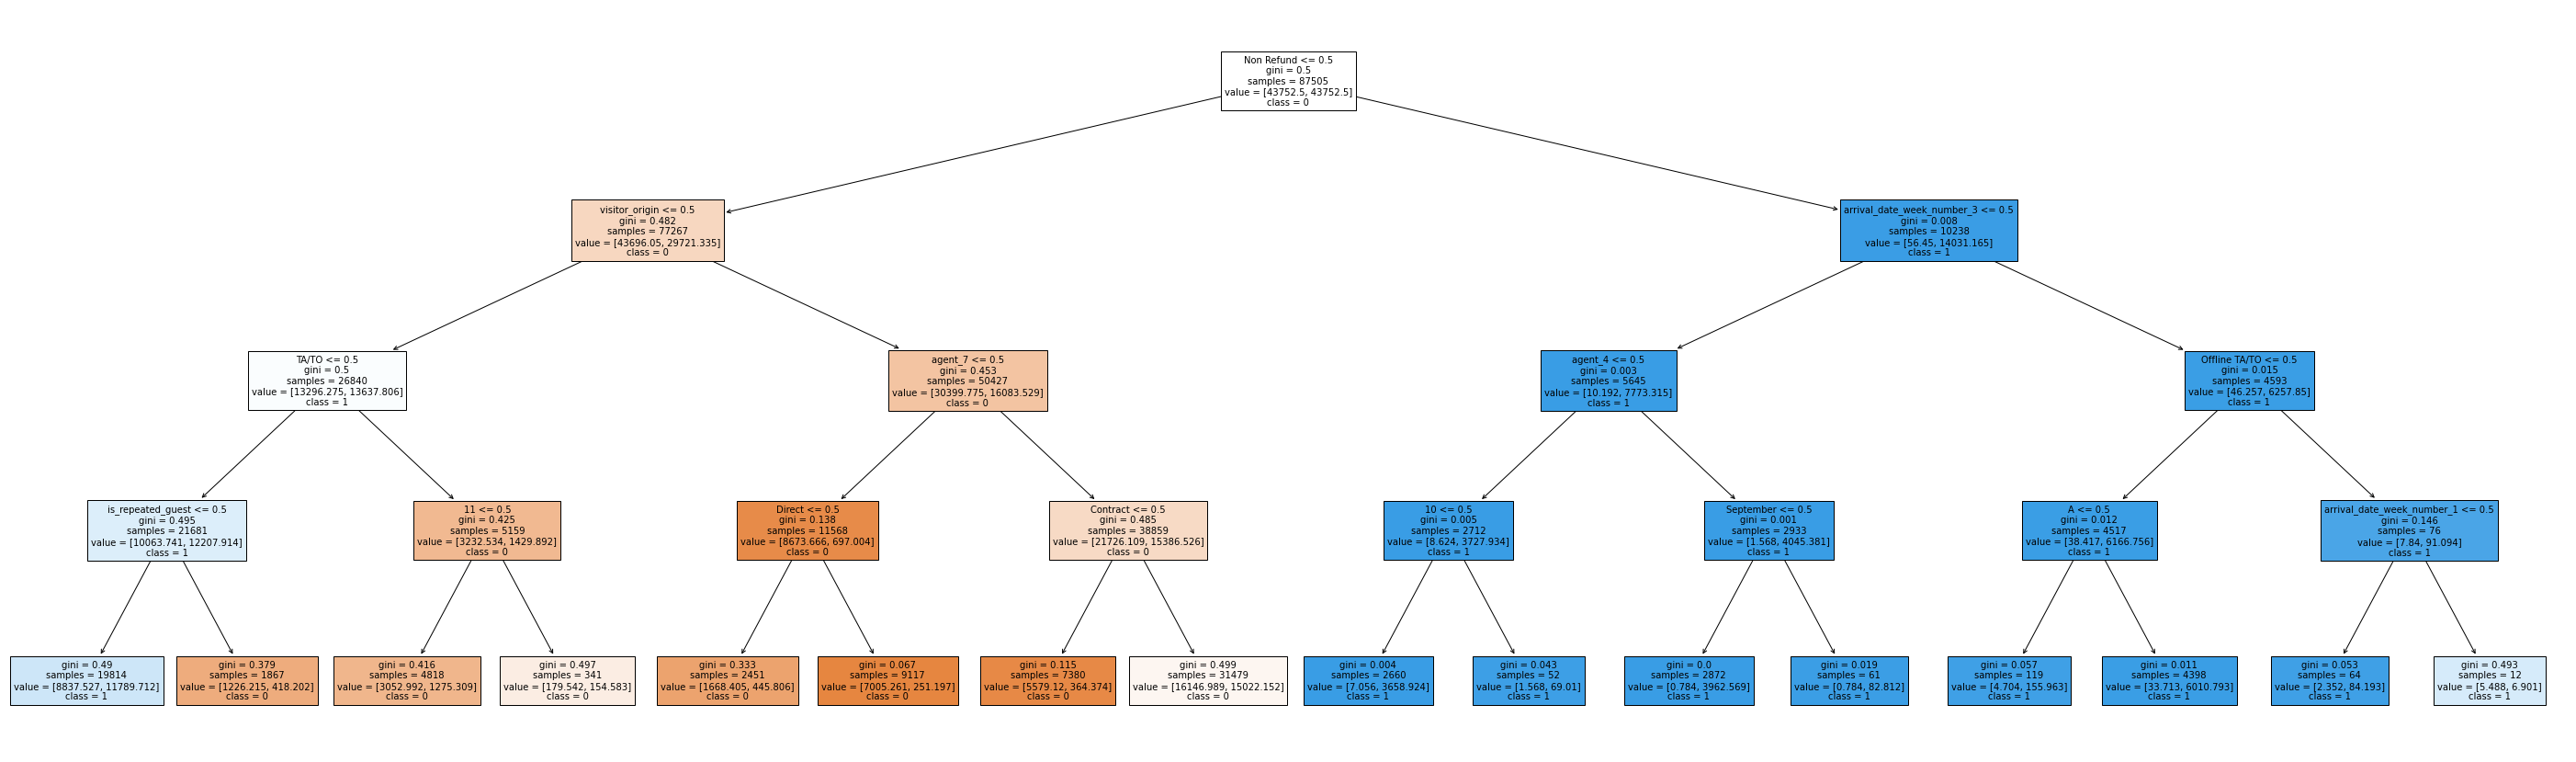

<Figure size 432x288 with 0 Axes>

In [55]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50,15))
tree.plot_tree(model_dt.best_estimator_,
               feature_names = training.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()
plt.savefig('decisiontree.jpg', dpi=800)

# XGBoost Classifier

In [56]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(objective='binary:logistic', random_state=42)
scores = cross_val_score(model_xgb, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
print('mean roc_auc :', scores.mean())
print('std roc_auc :', scores.std())

mean roc_auc : 0.996841590407336
std roc_auc : 0.0005164129703697285


In [57]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(objective='binary:logistic', random_state=42)
scores = cross_val_score(model_xgb, X_train, y_train, scoring='precision', cv=5, n_jobs=-1)
print('mean precision :', scores.mean())
print('std precision :', scores.std())

mean precision : 0.995139255356565
std precision : 0.0006493370027179912


In [58]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(objective='binary:logistic', random_state=42)
scores = cross_val_score(model_xgb, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('mean accuracy :', scores.mean())
print('std accuracy :', scores.std())

mean accuracy : 0.9753156962459288
std accuracy : 0.0023614625815407075


In [59]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(objective='binary:logistic', random_state=42)
scores = cross_val_score(model_xgb, X_train, y_train, scoring='recall', cv=5, n_jobs=-1)
print('mean recall :', scores.mean())
print('std recall :', scores.std())

mean recall : 0.9364353312302839
std recall : 0.006482630653835759


In [60]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(objective='binary:logistic', random_state=42)
scores = cross_val_score(model_xgb, X_train, y_train, scoring='f1', cv=5, n_jobs=-1)
print('mean f1 :', scores.mean())
print('std f1 :', scores.std())

mean f1 : 0.9648837101649479
std f1 : 0.0034788093875669913


In [61]:
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
eval_classification(model_xgb, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.49
Precision (Test Set): 0.42
Recall (Test Set): 0.97
F1-Score (Test Set): 0.59
F1-Score (Train Set): 0.98
AUC: 0.59


In [62]:
model_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [63]:
xgboost_evaluation = evaluate_prediction(y_test, y_pred)
xgboost_evaluation

{'accuracy': 0.492336041544518,
 'precision': 0.7356614531504364,
 'recall': 0.492336041544518,
 'f1': 0.4337533793512559}

### Hyperparameter Tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': [3, 4, 5],
             'learning_rate': [0.3, 0.2, 0.1, 0.05],
             'gamma': [0, 0.25, 0.5, 1.0],
             'reg_lambda':[0, 1.0, 5.0, 10.0],
             'scale_pos_weight':[1,3,5],
             'min_child_weight':[1,3,5]}

# Inisialisasi Model
xgb = XGBClassifier(objective='binary:logistic', subsample=1, colsample_bytree=1, random_state=42)
optimal_params = RandomizedSearchCV(xgb, param_grid, scoring='f1', cv=5, n_jobs=-1)

optimal_params.fit(X_train, y_train)
            #verbose=False,
            #early_stopping_rounds=10,
            #eval_metric='roc_auc',
            #eval_set=[(X_test, y_test)])

print(optimal_params.best_params_)
print('')

# Predict & Evaluation
y_pred = optimal_params.predict(X_test)
eval_classification(optimal_params, y_pred, X_train, y_train, X_test, y_test)

{'scale_pos_weight': 3, 'reg_lambda': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.25}

Accuracy (Test Set): 0.53
Precision (Test Set): 0.44
Recall (Test Set): 0.96
F1-Score (Test Set): 0.60
F1-Score (Train Set): 0.93
AUC: 0.62


In [65]:
optimal_params.best_estimator_.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0.5,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.3,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 5,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 0,
 'sampling_method': 'uniform',
 'scale_pos_weight': 5,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

# Model Comparison

In [93]:
model_evaluations = pd.DataFrame({"logistic_regression": logistic_evaluation,
                                  "decision tree": decisiontree_evaluation,
                                  "random forest": random_forest_evaluation,
                                  "xgboost": xgboost_evaluation}).T
model_evaluations

,accuracy,precision,recall,f1
logistic_regression,0.587068,0.680643,0.587068,0.585159
decision tree,0.591758,0.495788,0.591758,0.502777
random forest,0.750314,0.748903,0.750314,0.749516
xgboost,0.492336,0.735661,0.492336,0.433753


In [94]:
# Scale the accuracy values
model_evaluations["f1"] = model_evaluations["f1"] 

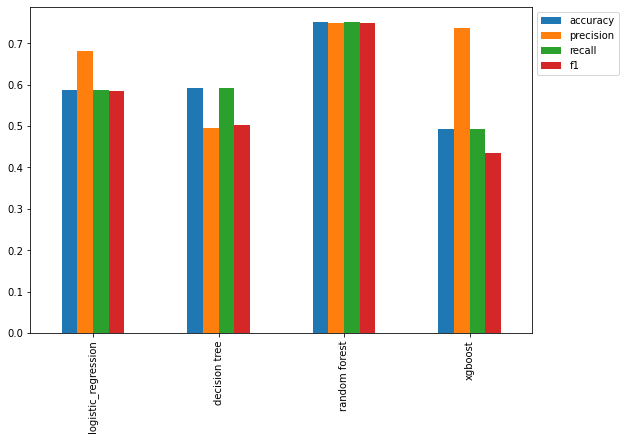

In [95]:
# Plot model evaluation metrics
model_evaluations.plot(kind="bar", figsize=(9,6)).legend(bbox_to_anchor=(1,1)) 

<AxesSubplot:>

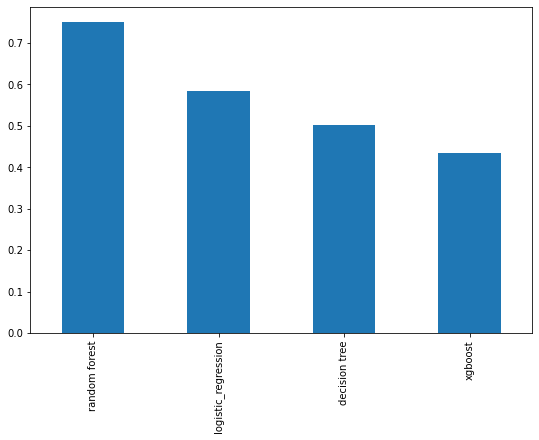

In [96]:
# Sort model evaluation by precision metric
model_evaluations.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(9,6)) 

# Final Model Evaluation

In [112]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Accuracy of Random Forest classifier on training set: {:.2f}'
       .format(model_rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
       .format(model_rf.score(X_test[X_train.columns], y_test)))

y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of Random Forest classifier on training set: 0.82
Accuracy of Random Forest classifier on test set: 0.64
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     15033
           1       0.67      0.65      0.66      8845

    accuracy                           0.75     23878
   macro avg       0.73      0.73      0.73     23878
weighted avg       0.75      0.75      0.75     23878



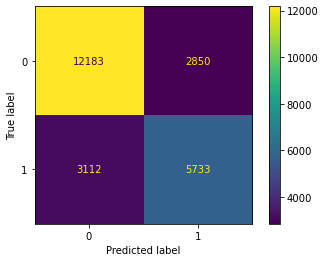

In [113]:
plot_confusion_matrix(model_rf,
                     X_test,
                     y_test,
                     values_format='d') 
plt.savefig('confusion_matrix (before).jpg', dpi=300, bbox_inches='tight')

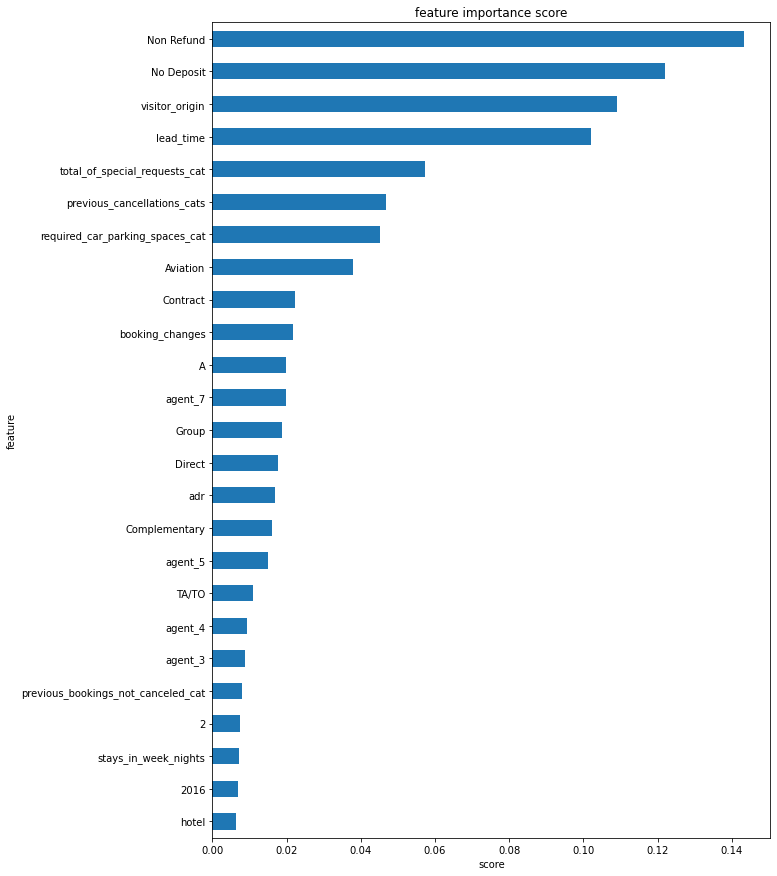

In [99]:
feat_importances = pd.Series(model_rf.best_estimator_.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 15))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')
plt.savefig('feature importance.jpg', dpi=600, bbox_inches='tight')

# Feature Selection

In [106]:
y_train_fs = y_train.copy()
X_train_fs = training.filter(['Non Refund', 'lead_time', 'visitor_origin', 'No Deposit'])

y_test_fs = y_test.copy()
X_test_fs = testing.filter(['Non Refund', 'lead_time', 'visitor_origin', 'No Deposit'])

X_train_fs.shape, X_test_fs.shape, y_train_fs.shape, y_test_fs.shape

((87505, 4), (23878, 4), (87505, 1), (23878, 1))

In [107]:
from sklearn.ensemble import RandomForestClassifier
model_rf_fs = RandomForestClassifier(random_state=42, class_weight = 'balanced') # max_features=5, n_estimators=100
scores = cross_val_score(model_rf, X_train_fs, y_train_fs, cv=5, scoring='f1', n_jobs=-1)
print('mean f1-score :', scores.mean())
print('std f1-score :', scores.std())

mean f1-score : 0.6352103342279399
std f1-score : 0.0050643868457271694


In [108]:
model_rf_fs.fit(X_train_fs, y_train_fs)

y_pred_fs = model_rf_fs.predict(X_test_fs)
eval_classification(model_rf_fs, y_pred_fs, X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.67
Recall (Test Set): 0.56
F1-Score (Test Set): 0.61
F1-Score (Train Set): 0.65
AUC: 0.70


In [109]:
model_rf_fs.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [110]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print('Accuracy of Random Forest classifier on training set: {:.2f}'
       .format(model_rf_fs.score(X_train_fs, y_train_fs)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
       .format(model_rf_fs.score(X_test_fs[X_train_fs.columns], y_test_fs)))

y_pred_fs = model_rf_fs.predict(X_test_fs)
print(classification_report(y_test_fs, y_pred_fs))

Accuracy of Random Forest classifier on training set: 0.77
Accuracy of Random Forest classifier on test set: 0.74
              precision    recall  f1-score   support

           0       0.76      0.84      0.80     15033
           1       0.67      0.56      0.61      8845

    accuracy                           0.74     23878
   macro avg       0.72      0.70      0.71     23878
weighted avg       0.73      0.74      0.73     23878



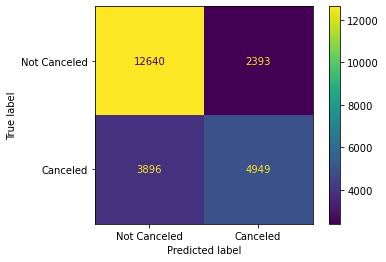

In [111]:
plot_confusion_matrix(model_rf_fs,
                     X_test_fs,
                     y_test_fs,
                     values_format='d',
                     display_labels=["Not Canceled", "Canceled"])
plt.savefig('confusion_matrix (after).jpg', dpi=300, bbox_inches='tight')

Setelah dilakukan feature selection ulang menggunakan lima (5) feature utama dari feature importance, hasil keluaran dari model Random Forest berupa confusion matrix tidaklah jauh berbeda dengan confusion matrix sebelum dilakukan feature selection ulang. Hal ini mengindikasikan bahwa performa model sebelum dan sesudah dilakukan feature selection ulang tidaklah berbeda jauh, bahkan hanya dengan lima fitur utama, menjadikan model Random Forest setelah feature selection ulang dapat dikatakan cukup lebih baik dibanding model sebelumnya karena meskipun kompleksitas lebih kecil tapi performa model masih tergolong baik.
